#### Aula 04

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import t
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [80]:
lstx2 = (100, 125, 125, 150, 150, 200, 200, 250, 250, 300, 300, 350, 400, 400)
lsty2 = (150, 140, 180, 210, 190, 320, 280, 400, 430, 440, 390, 600, 610, 670)
df = pd.DataFrame({'x': lstx2, 'y': lsty2})
x = df['x']
y = df['y']

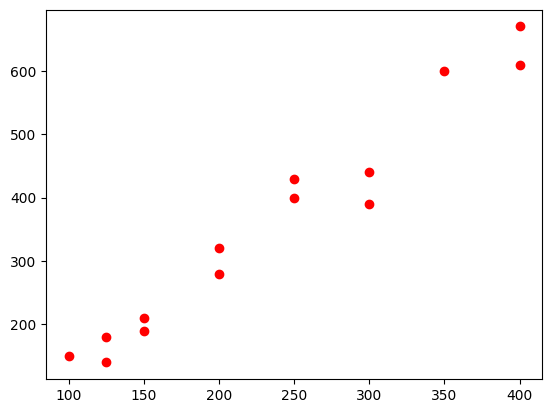

In [81]:
plt.scatter(x, y, color='red')
plt.show()

In [82]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
Sxx = ((df['x']-df['x'].mean())**2).sum()
print(slope, intercept, r, p, std_err)

1.711432325886991 -45.551905387647935 0.9802441873958024 8.22629625660354e-10 0.09968771803103654


In [83]:
x_pred = sm.add_constant(x)
modelo = sm.OLS(y, x_pred).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     294.7
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           8.23e-10
Time:                        01:46:57   Log-Likelihood:                -69.243
No. Observations:                  14   AIC:                             142.5
Df Residuals:                      12   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.5519     25.468     -1.789      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [84]:
df['yp'] = x*slope + intercept # calcular y esperado
df['e'] = df['y'] - df['yp'] # calcular o erro
# calcular o erro padrão:
# calcular residual padronizado:
df['residual_padronizado'] = (df['e']-df['e'].mean())/df['e'].std()
x_mean = df['x'].mean()
df['e*'] = df['e']/(std_err*np.sqrt(1-1/(len(x)-2)-(df['x']-x_mean)**2/Sxx))

df

,x,y,yp,e,residual_padronizado,e*
0,100,150,125.591327,24.408673,0.691330,277.038835
1,125,140,168.377135,-28.377135,-0.803729,-313.122628
2,125,180,168.377135,11.622865,0.329196,128.250504
3,150,210,211.162943,-1.162943,-0.032938,-12.560635
4,150,190,211.162943,-21.162943,-0.599401,-228.575180
5,200,320,296.734560,23.265440,0.658950,245.018472
6,200,280,296.734560,-16.734560,-0.473975,-176.238929
7,250,400,382.306176,17.693824,0.501144,185.536933
8,250,430,382.306176,47.693824,1.350838,500.116077
9,300,440,467.877792,-27.877792,-0.789586,-297.055255


In [85]:
df_cars = pd.read_csv('carst.csv')
df_cars_1 = df_cars[df_cars.Etype != 1]

In [86]:
x = df_cars_1['cap_vol']
y = df_cars_1['consumo']
x_pred = sm.add_constant(x)
modelo = sm.OLS(y, x_pred).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     60.33
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.08e-06
Time:                        01:46:57   Log-Likelihood:                -21.429
No. Observations:                  14   AIC:                             46.86
Df Residuals:                      12   BIC:                             48.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9686      0.566     21.145      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [93]:
b = modelo.params # interceptação e inclinação
b0 = b[0]
b1 = b[1]  
print('y = ', b0, ' + ', b1, 'x')

y =  11.968578736702085  +  -0.0012593116220535798 x


In [94]:
influence = modelo.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
stdresid

[0.9233827492041637,
 -0.28198833644792975,
 1.860422243074898,
 0.04758365876519643,
 0.4747162565491545,
 -1.048676545983168,
 0.04004768395666143,
 -0.21744049449304717,
 -1.4571510025969494,
 -0.7246842987852639,
 -0.8310476590525756,
 -0.8214221417417785,
 2.1190468773338376,
 0.2324262991175103]

In [95]:

df_1 = pd.DataFrame()
df_1['x'] = df_cars_1['cap_vol']
df_1['y'] = df_cars_1['consumo']
df_1['yp'] = b0 + b1*df_1['x']
df_1['e'] = df_1['y'] - df_1['yp']
influence = modelo.get_influence()
df_1['e*'] = list(influence.resid_studentized_internal)
df_1['e/e*'] = df_1['e']/df_1['e*']
df_1


,x,y,yp,e,e*,e/e*
0,792,12.0,10.971204,1.028796,0.923383,1.114160
1,994,10.4,10.716823,-0.316823,-0.281988,1.123532
2,1000,12.8,10.709267,2.090733,1.860422,1.123795
3,1368,10.3,10.245840,0.054160,0.047584,1.138197
4,1598,10.5,9.956199,0.543801,0.474716,1.145529
5,1796,8.5,9.706855,-1.206855,-1.048677,1.150836
6,1997,9.5,9.453733,0.046267,0.040048,1.155287
7,1999,9.2,9.451215,-0.251215,-0.217440,1.155327
8,2996,6.5,8.195681,-1.695681,-1.457151,1.163696
9,3197,7.1,7.942559,-0.842559,-0.724684,1.162657


c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


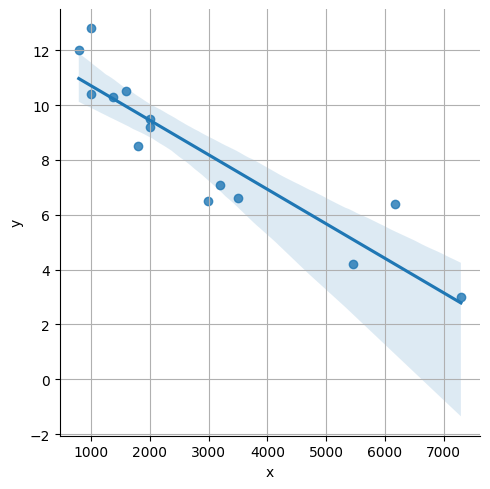

In [96]:
sns.lmplot(x = 'x', y = 'y', data=df_1, fit_reg=True)
plt.grid(True)
plt.show()

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


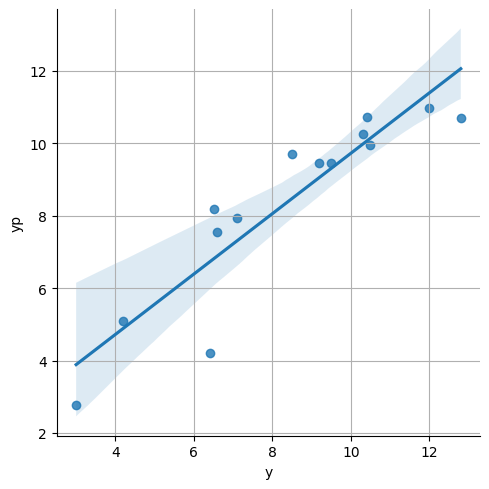

In [97]:
sns.lmplot(x = 'y', y = 'yp', data=df_1, fit_reg=True)
plt.grid(True)
plt.show()

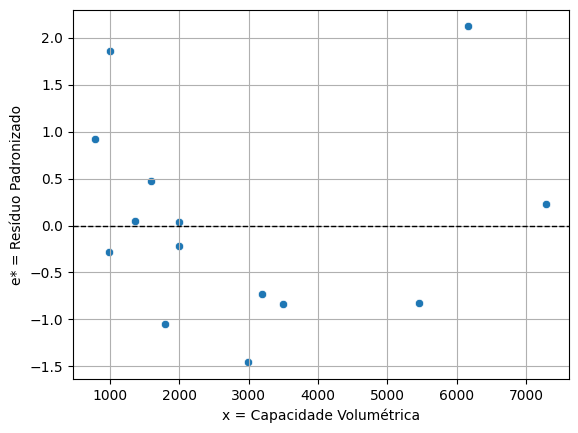

In [98]:
sns.scatterplot(x = 'x', y = 'e*', data=df_1)
plt.grid(True)
plt.xlabel('x = Capacidade Volumétrica')
plt.ylabel('e* = Resíduo Padronizado')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

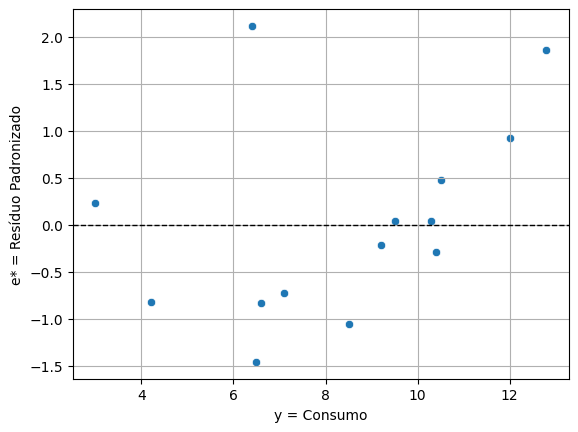

In [99]:
sns.scatterplot(x = 'y', y = 'e*', data=df_1)
plt.grid(True)
plt.xlabel('y = Consumo')
plt.ylabel('e* = Resíduo Padronizado')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos Padronizados')

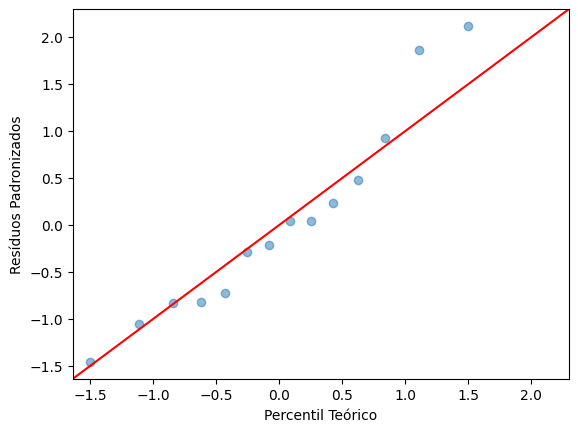

In [102]:
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil Teórico')
plot_lm_2.axes[0].set_ylabel('Resíduos Padronizados')

In [103]:
lstx = (5, 10, 15, 20, 25, 30, 45, 60)
lsty= (16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3)

df = pd.DataFrame({'x': lstx, 'y': lsty})
x = df['x']
y = df['y']
df

,x,y
0,5,16.3
1,10,9.7
2,15,8.1
3,20,4.2
4,25,3.4
5,30,2.9
6,45,1.9
7,60,1.3


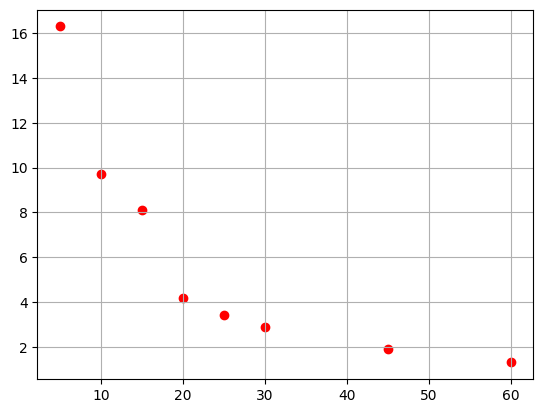

In [106]:
plt.scatter(x, y, color='red')
plt.grid(True)
plt.show()

In [108]:
x_pred = sm.add_constant(x)
modelo = sm.OLS(y, x_pred).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 06 Sep 2023   Prob (F-statistic):             0.0147
Time:                        02:02:22   Log-Likelihood:                -19.587
No. Observations:                   8   AIC:                             43.17
Df Residuals:                       6   BIC:                             43.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8599      2.079      5.705      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


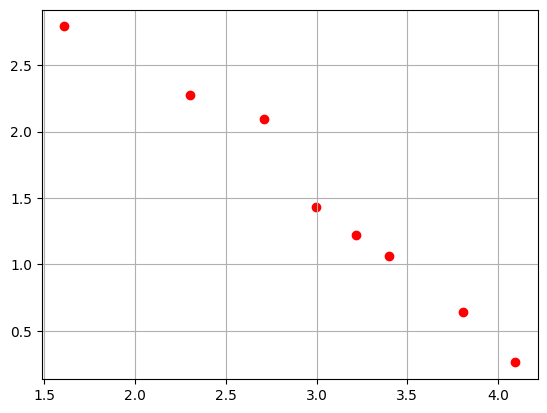

In [112]:
df['ln_x'] = np.log(x)
df['ln_y'] = np.log(y)

plt.scatter(df['ln_x'], df['ln_y'], color='red')
plt.grid(True)
plt.show()

In [113]:
x_pred = sm.add_constant(df['ln_x'])
modelo = sm.OLS(df['ln_y'], x_pred).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.63e-06
Time:                        02:05:26   Log-Likelihood:                 5.2525
No. Observations:                   8   AIC:                            -6.505
Df Residuals:                       6   BIC:                            -6.346
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6384      0.211     21.978      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [119]:
parametros = modelo.params
b0 = parametros[0]
b1 = parametros[1]
x_20 = 20
y_20 = np.exp(b0 + b1*np.log(x_20))
print('y_20 = ', y_20)
alfa = np.exp(b0)
beta = b1
print('alfa = ', alfa)
print('beta = ', beta)
y_20_exp = alfa * x_20**beta
print('y_20_exp = ', y_20_exp)

y_20 =  4.460666572067302
alfa =  103.38034777939293
beta =  -1.049198121311452
y_20_exp =  4.460666572067302


In [121]:
t_crit = t.ppf(0.975, df = len(df)-2)
print('t_crit = ', t_crit)

t_crit =  2.4469118487916806


In [123]:
residuos = modelo.resid
SQE = (residuos**2).sum()
print('SQE = ', SQE)
s2 = SQE/(len(df)-2)
print('s2 = ', s2)
s = np.sqrt(s2)
print('s = ', s)

SQE =  0.1259894484543931
s2 =  0.02099824140906552
s =  0.14490769961967348


In [126]:
vtx = np.log(x)
vty = np.log(y)
y_pred = list(modelo.predict())
vtxs = np.log(20)
vtxm = df['ln_x'].mean()
n = len(df)
xx = np.sum(vtx**2)
xau = np.sum(vtx)
Sxx = xx - xau**2/n
Sy = s*np.sqrt((1/n)+(vtxs-vtxm)*(vtxs-vtxm)/Sxx)
print('Sy = ', Sy)

Sy =  0.05125314354652712


In [131]:
erro_y_log_20 = t_crit*np.sqrt(s2 - Sy**2)
print('erro_y_log_20 = ', erro_y_log_20)
y_log_20 = b0 + b1*vtxs
print('y_log_20 = ', y_log_20)
print('Intervalo de confiança de y linha =', y_log_20 - erro_y_log_20, ' < y < ', y_log_20 + erro_y_log_20)

erro_y_log_20 =  0.3316568247803911
y_log_20 =  1.4952982104850654
Intervalo de confiança de y linha = 1.1636413857046743  < y <  1.8269550352654564


In [132]:
print('Intervalo de confiança de y =', np.exp(y_log_20 - erro_y_log_20), ' < y < ', np.exp(y_log_20 + erro_y_log_20))

Intervalo de confiança de y = 3.2015702280032947  < y <  6.2149335638868815


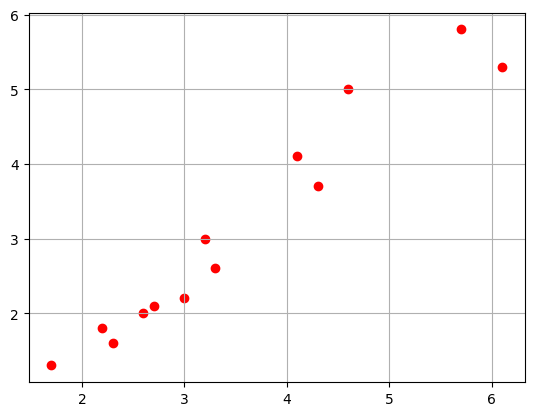

In [133]:
x = (1.7, 2.2, 2.3, 2.6, 2.7, 3.0, 3.2, 3.3, 4.1, 4.3, 4.6, 5.7, 6.1)
y = (1.3, 1.8, 1.6, 2.0, 2.1, 2.2, 3.0, 2.6, 4.1, 3.7, 5.0, 5.8, 5.3)
df = pd.DataFrame({'x': x, 'y': y})
plt.scatter(df['x'], df['y'], color='red')
plt.grid(True)
plt.show()

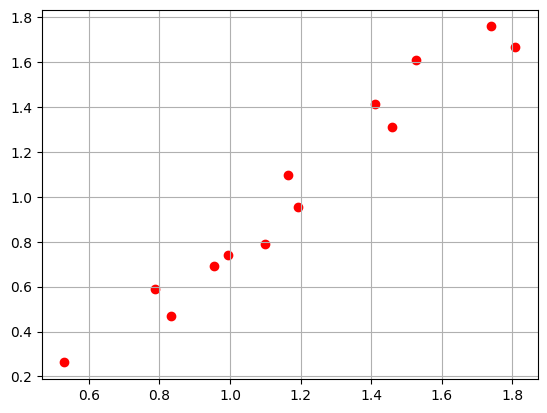

In [134]:
df['ln_x'] = np.log(df['x'])
df['ln_y'] = np.log(df['y'])
plt.scatter(df['ln_x'], df['ln_y'], color='red')
plt.grid(True)
plt.show()

In [135]:
x_pred = sm.add_constant(df['ln_x'])
modelo = sm.OLS(df['ln_y'], x_pred).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.5
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.15e-09
Time:                        02:46:30   Log-Likelihood:                 12.264
No. Observations:                  13   AIC:                            -20.53
Df Residuals:                      11   BIC:                            -19.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4676      0.097     -4.836      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [141]:
b = modelo.params
b0 = b[0]
b1 = b[1]
alfa = np.exp(b0)
beta = b1
print('ln_y = ', b0, ' + ', b1, '* ln_x')
print('y = ', alfa, '* x ^', beta)

ln_y =  -0.4676194453983052  +  1.2535562199105885 * ln_x
y =  0.6264918926711472 * x ^ 1.2535562199105885
